<a href="https://colab.research.google.com/github/sahithidevarashetty/sahithi_INFO5731_Fall2021/blob/main/INFO5731_Assignment_Two_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Two**

In this assignment, you will try to gather text data from open data source via web scraping or API. After that you need to clean the text data and syntactic analysis of the data.

# **Question 1**

(40 points). Write a python program to collect text data from **either of the following sources** and save the data into a **csv file**:

(1) Collect all the customer reviews of the product [Apple iPhone 11](https://www.amazon.com/Apple-iPhone-11-64GB-Unlocked/dp/B07ZPKF8RG/ref=sr_1_13?dchild=1&keywords=iphone+12&qid=1631721363&sr=8-13) on amazon.

(2) Collect the top 10000 User Reviews of the film [Shang-Chi and the Legend of the Ten Rings](https://www.imdb.com/title/tt9376612/reviews?ref_=tt_sa_3) from IMDB.

(3) Collect all the reviews of the top 100 most popular software from [G2](https://www.g2.com/) or [Capterra](https://www.capterra.com/)

(4) Collect the abstracts of the top 10000 research papers by using the query [natural language processing](https://citeseerx.ist.psu.edu/search?q=natural+language+processing&submit.x=0&submit.y=0&sort=rlv&t=doc) from CiteSeerX.

(5) Collect all the information of the 904 narrators in the [Densho Digital Repository](https://ddr.densho.org/narrators/).

(6) Collect the top 10000 tweets by using hashtag ["#blacklivesmatter"](https://twitter.com/hashtag/blacklivesmatter) from Twitter. 


In [ ]:
# Write your code here

from bs4 import BeautifulSoup
import requests
import pandas as pd

base_url = "https://www.amazon.in/Apple-iPhone-11-128GB-Black/product-reviews/B07XVLW7YK/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
all_reviewers = []
all_reviews = []
for i in range(1, 100):
  soup = BeautifulSoup(requests.get(base_url+str(i)).text, 'html.parser')
  reviews = soup.findAll("div", {"class" : "review"})
  for review in reviews:
    name = review.find("span", {"class" : "a-profile-name"}).get_text()
    review = review.find("span", {"class" : "review-text-content"}).get_text()

    all_reviewers.append(name)
    all_reviews.append(review)

df = pd.DataFrame({
  "name": all_reviewers,
  "reviews": all_reviews
})

In [ ]:
df.head()

,name,reviews
0,pk2013,\nBeen almost 10 months I have been using the ...
1,PR,\nThis is my first iPhone. After being an Andr...
2,Lalhruaitluanga,\nIf u read the review you will know that ther...
3,BJ Mansata,"\nAn excellent response received from AMAZON, ..."
4,Abhishek Mukherjee,"\nFrom the last 3 months, i was waiting for th..."


# **Question 2**

(30 points). Write a python program to **clean the text data** you collected above and save the data in a new column in the csv file. The data cleaning steps include:

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the [stopwords list](https://gist.github.com/sebleier/554280).

(4) Lowercase all texts

(5) Stemming. 

(6) Lemmatization.

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
stopWordsCache = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Write your code here
def remove_noise(s):
  result =  s.translate(str.maketrans('', '', string.punctuation))
  return result.replace("\n", "")

def remove_numbers(s):
  return ''.join([i for i in s if not i.isdigit()])

def remove_stopWords(s):
  return ' '.join([word for word in s.split() if word not in stopWordsCache])

def lowercase_words(s):
  return s.lower()

def stemming(s):
  return [stemmer.stem(word) for word in s.split()]

def lemmatization(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df['cleaned_data'] = df['reviews'].apply(remove_noise).apply(remove_numbers).apply(remove_stopWords).apply(lowercase_words).apply(stemming).apply(lemmatization)
df.to_csv('cleaned_data.csv', index=False)  

# **Question 3**

(30 points). Write a python program to conduct **syntax and structure analysis** of the clean text you just saved above. The syntax and structure analysis includes: 

(1) Parts of Speech (POS) Tagging: Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) Constituency Parsing and Dependency Parsing: print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) Named Entity Recognition: Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [ ]:
# Write your code here
nltk.download('averaged_perceptron_tagger')

#1. Parts of Speech
df['pos_tag'] = df['cleaned_data'].apply(lambda x: nltk.pos_tag(x))

count_dict = {
    'nouns' : 0,
    'verbs' : 0,
    'adjectives' : 0,
    'adverbs' : 0
}

def calculate_pos_tags(tags):
  for tag in tags:
    words = tag[0]
    pos = tag[1]

    if(pos.startswith("N")):
      count_dict['nouns'] += 1
    if(pos.startswith("V")):
      count_dict['verbs'] += 1
    if(pos.startswith("J")):
      count_dict['adjectives'] += 1
    if(pos.startswith("RB")):
      count_dict['adverbs'] += 1

df['pos_tag'].apply(calculate_pos_tags)
print("-- Total numbe of POS --")
print(count_dict)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


-- Total numbe of POS --
{'nouns': 8223, 'verbs': 1672, 'adjectives': 3139, 'adverbs': 654}


In [ ]:
#2. Constituency Parsing and Dependency parsing
!pip install benepar
import benepar, spacy
import en_core_web_sm
benepar.download('benepar_en3')
nlp = en_core_web_sm.load()
nlp.add_pipe('benepar', config={'model': 'benepar_en3'})

def constituency_parser(s):
  doc = nlp('The time for action is now. It is never too late to do something.')
  sent = list(doc.sents)[0]
  return sent._.parse_string

df['constituency_tree'] = df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(constituency_parser)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!
You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


,name,reviews,cleaned_data,pos_tag,constituency_tree
0,pk2013,\nBeen almost 10 months I have been using the ...,"[been, almost, month, i, use, iphon, gb, appl,...","[(been, VBN), (almost, RB), (month, NN), (i, N...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
1,PR,\nThis is my first iPhone. After being an Andr...,"[thi, first, iphon, after, android, enthusiast...","[(thi, NN), (first, RB), (iphon, RB), (after, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
2,Lalhruaitluanga,\nIf u read the review you will know that ther...,"[if, u, read, review, know, mani, bad, comment...","[(if, IN), (u, JJ), (read, VBP), (review, NN),...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
3,BJ Mansata,"\nAn excellent response received from AMAZON, ...","[an, excel, respons, receiv, amazon, if, i, sh...","[(an, DT), (excel, JJ), (respons, NNS), (recei...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...
4,Abhishek Mukherjee,"\nFrom the last 3 months, i was waiting for th...","[from, last, month, wait, best, possibl, phone...","[(from, IN), (last, JJ), (month, NN), (wait, V...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...


In [ ]:

def dependency_parser(s):
  doc = nlp(s)
  tree_dict = {}
  for token in doc:
    tree_dict[token] = {
        'relation' : str(token.dep_),
        'head' : str(token.head.text),
        'children' : str([child for child in token.children])
    }
  return tree_dict

df['dependency_tree'] = df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(dependency_parser)
df.head()

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


,name,reviews,cleaned_data,pos_tag,constituency_tree,dependency_tree
0,pk2013,\nBeen almost 10 months I have been using the ...,"[been, almost, month, i, use, iphon, gb, appl,...","[(been, VBN), (almost, RB), (month, NN), (i, N...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{been: {'relation': 'advcl', 'head': 'use', 'c..."
1,PR,\nThis is my first iPhone. After being an Andr...,"[thi, first, iphon, after, android, enthusiast...","[(thi, NN), (first, RB), (iphon, RB), (after, ...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{thi: {'relation': 'ROOT', 'head': 'thi', 'chi..."
2,Lalhruaitluanga,\nIf u read the review you will know that ther...,"[if, u, read, review, know, mani, bad, comment...","[(if, IN), (u, JJ), (read, VBP), (review, NN),...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{if: {'relation': 'mark', 'head': 'read', 'chi..."
3,BJ Mansata,"\nAn excellent response received from AMAZON, ...","[an, excel, respons, receiv, amazon, if, i, sh...","[(an, DT), (excel, JJ), (respons, NNS), (recei...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{an: {'relation': 'det', 'head': 'amazon', 'ch..."
4,Abhishek Mukherjee,"\nFrom the last 3 months, i was waiting for th...","[from, last, month, wait, best, possibl, phone...","[(from, IN), (last, JJ), (month, NN), (wait, V...",(S (NP (NP (DT The) (NN time)) (PP (IN for) (N...,"{from: {'relation': 'prep', 'head': 'wait', 'c..."


**Write your explanations of the constituency parsing tree and dependency parsing tree here (Question 3-2):** 

Constituency parsing is breaking a sentence into its sub-phrases in a tree like structure, where child nodes are sub-phrases and all leaf-nodes are words in the sentence. All non-terminal node represent a parts-of-speech tag - like a noun phrase, verb phrase, adjective phrase etc. 

Dependency parsing does not use sub-phrases like constituency parsing, but rather outlines the dependency between each word and other words in the sentence. It is expressed in a graph like format.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


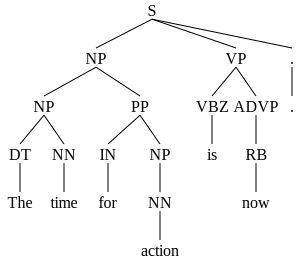

In [ ]:
!pip install svgling
from nltk.tree import Tree

example_sentence = df[['constituency_tree', 'dependency_tree']].iloc[0]
cons_tree = Tree.fromstring(example_sentence[0])
cons_tree

As you can see the constituency tree has words as left nodes and sub-phrases the denote to parts-of-speech in non-leaf nodes.

In [ ]:
dep_tree = example_sentence[1]
print(dep_tree)

{been: {'relation': 'advcl', 'head': 'use', 'children': '[month]'}, almost: {'relation': 'advmod', 'head': 'month', 'children': '[]'}, month: {'relation': 'attr', 'head': 'been', 'children': '[almost]'}, i: {'relation': 'nsubj', 'head': 'use', 'children': '[]'}, use: {'relation': 'ccomp', 'head': 'came', 'children': '[been, i, claim, allow]'}, iphon: {'relation': 'compound', 'head': 'gb', 'children': '[]'}, gb: {'relation': 'nmod', 'head': 'compani', 'children': '[iphon]'}, appl: {'relation': 'advmod', 'head': 'known', 'children': '[]'}, known: {'relation': 'amod', 'head': 'compani', 'children': '[appl]'}, one: {'relation': 'nummod', 'head': 'phone', 'children': '[]'}, premium: {'relation': 'compound', 'head': 'phone', 'children': '[]'}, phone: {'relation': 'compound', 'head': 'qualiti', 'children': '[one, premium]'}, manufactur: {'relation': 'compound', 'head': 'qualiti', 'children': '[]'}, compromis: {'relation': 'compound', 'head': 'qualiti', 'children': '[]'}, qualiti: {'relation':

As you can see the word "been" is realted to work "advcl" and is connected to the ROOT "use" and has one child "month". Dependency tree outlines the relationship between one word ot the next.

In [49]:
#3. Named entity recognition

"""

 Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, 
 calculate the count of each entity.

"""
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

entity_count = {
    'person_names' : 0,
    'organizations' : 0,
    'locations' : 0,
    'product_names' : 0,
    'date' : 0
}

def ner_recognition(s):
  text = NER(s)
  for word in text.ents:
    if(word.label_ == 'PERSON'):
      entity_count['person_names'] += 1
    if(word.label_ == 'ORG'):
      entity_count['organizations'] += 1
    if(word.label_ == 'LOC'):
      entity_count['locations'] += 1
    if(word.label_ == 'PRODUCT'):
      entity_count['product_names'] += 1
    if(word.label_ == 'DATE'):
      entity_count['date'] += 1


df['cleaned_data'].apply(lambda x: ' '.join(x)).apply(ner_recognition)
print(entity_count)

{'person_names': 217, 'organizations': 107, 'locations': 1, 'product_names': 1, 'date': 91}
